In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(Path('sealevel.csv'))
df.head()

,Year,TotalWeightedObservations,Global Isostatic Adjustment,Standard_Deviation_of_Global_Mean_Sea_Level,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


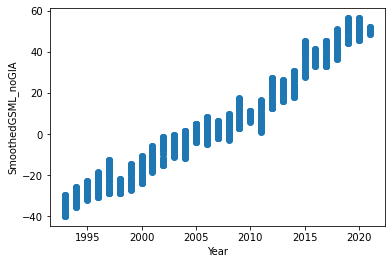

In [3]:
plt.scatter(df.Year, df.SmoothedGSML_noGIA)
plt.xlabel('Year')
plt.ylabel('SmoothedGSML_noGIA')
plt.show()

In [4]:
X = df.Year.values.reshape(-1, 1)

In [5]:
X[:5]

array([[1993],
       [1993],
       [1993],
       [1993],
       [1993]], dtype=int64)

In [6]:
X.shape

(1048, 1)

In [7]:
y = df.SmoothedGSML_noGIA


In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
y_pred = model.predict(X)
print(y_pred.shape)

(1048,)


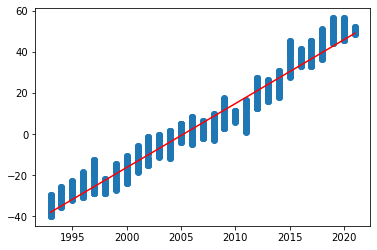

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
print(model.coef_)
print(model.intercept_)

[3.10787931]
-6232.011072745922


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
univariate_regression = np.array([row[0] for row in X]).reshape(-1, 1)

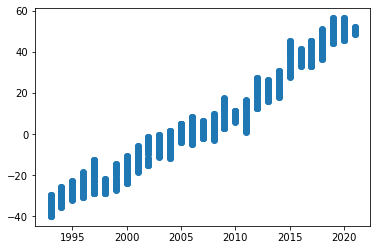

In [15]:
plt.scatter(univariate_regression, y)

In [16]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [17]:
model.fit(univariate_regression, y)

LinearRegression()

In [18]:
# Print the coefficient and the intercept for the model.

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [3.10787931]
y-axis intercept:  -6232.011072745922


In [19]:
x_min = np.array([[univariate_regression.min()]])
x_max = np.array([[univariate_regression.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1993]]
Max X Value: [[2021]]


In [20]:
### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

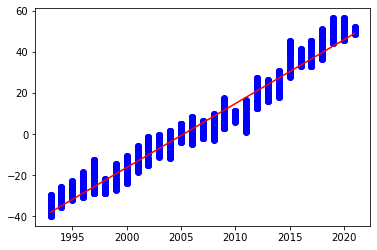

In [22]:
### BEGIN SOLUTION
plt.scatter(univariate_regression, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [23]:
# Use train_test_split to create training and testing data.

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [24]:
# Create the model by using LinearRegression.

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [25]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9565177218293885
Testing Score: 0.9523812269393932


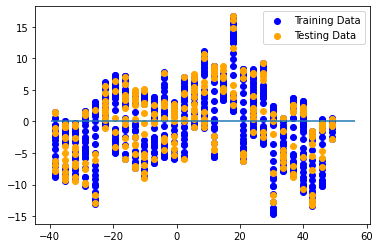

In [26]:
# Plot the residuals for the training and testing data.

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.show()
### END SOLUTION